## Spam recognition

Select python **3.9.13** as a kernel for this notebook as pymorphy2 failed with later versions.  

as on the 26th of April,2023 pymorphy2 version 0.9.1 is the latest and doesn't work with Python 3.11.3

In [247]:
# experimenting with notion of libraries versions
soft_list = {'pandas': 'pd',
             'numpy': 'np',
             'matplotlib.pyplot': 'plt',
             'plotly.express': 'px',
             'seaborn': 'sns',
             'pymorphy2': '',
             'nltk': '',
             're': '',
             'torch': '',
             'TfidfVectorizer': 'from sklearn.feature_extraction.text import ',
             'LogisticRegression': 'from sklearn.linear_model import ',
             'train_test_split': 'from sklearn.model_selection import ',
             'f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve': 'from sklearn.metrics import ',
             'LabelEncoder': 'from sklearn.preprocessing import ',
             'plotly.graph_objects': 'go',

              }          
   

for  package in soft_list.keys():  
    if soft_list[package]:
        if soft_list[package].__contains__('from'):
            import_as = f'{soft_list[package]}{package}'
            item = f'{package}' 
        else:
            import_as = f'import {package} as {soft_list[package]}'
            item = f'{soft_list[package]}'
    else:
        import_as = 'import '+ package
        item = f'{package}'

    exec(import_as)
    if soft_list[package].__contains__('from') or package.__contains__('.'):
        print(f'{item:<30}' )
    else:
        print(f'{item:<30}  version: {eval(item).__version__}')
       

pd                              version: 1.5.2
np                              version: 1.21.5
plt                           
px                            
sns                             version: 0.12.2
pymorphy2                       version: 0.9.1
nltk                            version: 3.7
re                              version: 2.2.1
torch                           version: 2.0.0
TfidfVectorizer               
LogisticRegression            
train_test_split              
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve
LabelEncoder                  
go                            


## CountVectorizer

In [248]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]


In [249]:
count_vectorizer = CountVectorizer()              # Convert a collection of text documents to a matrix of token counts.

# this steps generates word counts for the words in your docs 
word_count_vector = count_vectorizer.fit_transform(corpus)        # Learn the vocabulary dictionary and return document-term matrix.
print("Dense format:")
# print( X.toarray())                         # Return a dense ndarray representation of this matrix.
print(word_count_vector.todense())                          # Return a dense matrix representation of this matrix.
print(count_vectorizer.get_feature_names_out())   # Transformed feature names


display(word_count_vector)


Dense format:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [250]:
display(word_count_vector.nonzero())                        # Return the indices and values of the nonzero elements of a matrix or CSR matrix.

print("Sparse format:")

print('(row, col)    count')
print(word_count_vector)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
       dtype=int32),
 array([8, 3, 6, 2, 1, 8, 3, 6, 1, 5, 8, 3, 6, 0, 7, 4, 8, 3, 6, 2, 1],
       dtype=int32))

Sparse format:
(row, col)    count
  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


n-граммы

In [251]:
count_vectorizer = CountVectorizer( ngram_range=(1, 2)) # default analyzer='word'
word_count_vector = count_vectorizer.fit_transform(corpus)
display(count_vectorizer.get_feature_names_out())
print(word_count_vector.toarray())
word_count_vector.shape    # 4 rows, 13 - size of vocabulary 

array(['and', 'and this', 'document', 'document is', 'first',
       'first document', 'is', 'is the', 'is this', 'one', 'second',
       'second document', 'the', 'the first', 'the second', 'the third',
       'third', 'third one', 'this', 'this document', 'this is',
       'this the'], dtype=object)

[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


(4, 22)

## TF-IDF (stands for Term Frequency-Inverse Document Frequency)


### $TF(t, d) = \frac{n_t}{\sum_{k} n_k} = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}} = \frac{word}{\sum{words}}$  
$t$ represents a term or `word`,  
and $d$ represents a `specific document`.  
The formula calculates the term frequency of term t in document d. 

### $IDF(t, D) = \log{\left(\frac{N_D}{n_{D_t}}\right)} = \log{\left(\frac{\text{Total number of documents}}{\text{Number of documents with term t in it}}\right)}$
$t$ represents a term or word,  
and $D$ represents a `collection of documents`.  
The formula calculates the inverse document frequency of term t in the collection D. 


### $TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)$  

where $t$ represents a term or word,  
$d$ represents a specific document, and  
$D$ represents a collection of documents.


In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [253]:
corpus 

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [254]:
tfid_vectorizer = TfidfVectorizer()          # Convert a collection of raw documents to a matrix of TF-IDF features.
word_count_vector = tfid_vectorizer.fit_transform(corpus)    # Learn the vocabulary dictionary and return document-term matrix

# Get the feature names and corresponding tf-idf scores
feature_names = tfid_vectorizer.get_feature_names_out()
print(feature_names)


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


#### Sort words by tf-idf 

In [255]:
# tfidf_scores = vectorizer.idf_                  # idf_ is the inverse document frequency
# sort_indices = np.argsort(tfidf_scores)[::-1]   # Returns the indices that would sort an array.  [::-1] - reverse order  

# for i, tup in enumerate(zip(feature_names[sort_indices], tfidf_scores[sort_indices])):
#     print(f'{i}. {tup[0]:<15} {tup[1]:.3f}')
    
res=sorted(zip(tfid_vectorizer.idf_, feature_names ), key= (lambda x: x[0]),reverse=True)
display(res[:5])


[(1.916290731874155, 'and'),
 (1.916290731874155, 'one'),
 (1.916290731874155, 'second'),
 (1.916290731874155, 'third'),
 (1.5108256237659907, 'first')]

In [256]:

# print idf values 
df_idf = pd.DataFrame(tfid_vectorizer.idf_, index=tfid_vectorizer.get_feature_names_out(),columns=["idf_weights"]) 

# sort ascending 
df_idf.sort_values(by=['idf_weights'], ascending=False)

,idf_weights
and,1.916291
one,1.916291
second,1.916291
third,1.916291
first,1.510826
document,1.223144
is,1.000000
the,1.000000
this,1.000000


In [257]:
count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 3))
word_count_vector = count_vectorizer.fit_transform(corpus)

print(count_vectorizer.get_feature_names_out())
print(word_count_vector.toarray())
word_count_vector.shape    # 4 rows, 34 - number of terms(tokens) in the vocabulary

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'is this' 'is this the' 'one' 'second' 'second document'
 'the' 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the' 'this the' 'this the first']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


(4, 34)

## Токенизация и разбор предложения

In [258]:
# nltk.download('punkt')      # NLTK will download the Punkt tokenizer data and store it in your NLTK data directory. 
# nltk.download('stopwords')  # NLTK will download the stopwords data and store it in your NLTK data directory.

# in case of SSL error: MacOS users can probably resolve by 
# opening Finder and double clicking Install Certificates.command in Applications/Python X.XX folder

In [259]:
from nltk.tokenize import sent_tokenize   # Tokenize a sentence into a list of sentences
from nltk.tokenize import word_tokenize   # Tokenize a sentence into a list of words
from nltk.corpus import stopwords         # Corpus reader for stopwords


### Splitting text -> sentences -> words -> remove stopwords

In [260]:
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."
# return list of text splitted into sentences
sentences = sent_tokenize(text)             
print(f'{len(sentences)} sentences:{sentences}')

# return list of text splitted into words
tokens = word_tokenize(" ".join(sentences)) 
print(f'{len(tokens)} words: {tokens}')

# return list of words without stopwords
words = [word.lower() for word in tokens if word not in stopwords.words('english')]  
print(f'{len(words)} words: {words}')


3 sentences:['Backgammon is one of the oldest known board games.', 'Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.', 'It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.']
52 words: ['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.', 'Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.', 'It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']
34 words: ['backgammon', 'one', 'oldest', 'known', 'board', 'games', '.', 'its', 'history', 'traced', 'back', 'nearly', '5,000', 'years', 'archeological', 'discoveries', 'middle', 'east', '.', 'it', 'two', 'player', 'game', 'player', 'f

In [261]:
morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')


In [262]:
text = "Обработка 123 текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики. Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках. Применительно к искусственному интеллекту анализ означает понимание языка, а синтез — генерацию грамотного текста."
sentences = sent_tokenize(text, language="russian")         # split text into sentences
for sentence in sentences:
    print('___________________')
    print('1. Sentence:           ',sentence)
    sentence_ = re.sub(r"[^А-Яа-яёЁA-Zaz ]","", sentence)        # substitute all non-Russian letters with empty string
    print('2. Remove non-letters: ',sentence_)
    tokens = nltk.word_tokenize(sentence_)                  # split sentences into words
    print('3. Words:              ',tokens)
    tokens = [i for i in tokens if (i not in stop_words)]   # remove stop_words
    print('4. Remove stop_words:  ',tokens)
    tokens = list(map(lambda x: morph.parse(x)[0].normal_form, tokens))# lemmatization [0]-return most frequent form
    print('5. Lemmatization:      ',tokens)

___________________
1. Sentence:            Обработка 123 текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики.
2. Remove non-letters:  Обработка  текстов на естественном языке  общее направление искусственного интеллекта и математической лингвистики
3. Words:               ['Обработка', 'текстов', 'на', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'и', 'математической', 'лингвистики']
4. Remove stop_words:   ['Обработка', 'текстов', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'математической', 'лингвистики']
5. Lemmatization:       ['обработка', 'текст', 'естественный', 'язык', 'общий', 'направление', 'искусственный', 'интеллект', 'математический', 'лингвистика']
___________________
1. Sentence:            Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках.
2. Remove non-letters:  Оно изучает проблемы компьютерного анализа и синт

In [263]:
morph.parse('банка')  # Parse a word and return a list of Parse objects describing possible parses in descending order of likelihood.

[Parse(word='банка', tag=OpencorporaTag('NOUN,inan,masc sing,gent'), normal_form='банк', score=0.954545, methods_stack=((DictionaryAnalyzer(), 'банка', 19, 1),)),
 Parse(word='банка', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='банка', score=0.045454, methods_stack=((DictionaryAnalyzer(), 'банка', 8, 0),))]

## word2vec

In [264]:
from gensim.models import KeyedVectors  # module provides a way to work with pre-trained word embeddings

Loading pre-trained word embedding model.

In [265]:
# !wget http://vectors.nlpl.eu/repository/20/222.zip
nlp_dir ='/Users/velo1/SynologyDrive/GIT_syno/data/NLP/'

# import zipfile
# # create a ZipFile object
# with zipfile.ZipFile(nlp_dir +'222.zip', 'r') as zip_ref:
#     # extract all the files to the specified directory
#     zip_ref.extractall(nlp_dir + 'unzip/')

# load the word2vec model
filename = nlp_dir + 'unzip/model.bin'

model = KeyedVectors.load_word2vec_format(filename, binary=True)


In [266]:
vector = model['computer']   # numpy vector of a word
vector.shape                 # the length of vectors in word2vec model 
                             # dimensions of the numpy array representing the word's embedding depth

(300,)

#### Find the top-N most similar words

In [267]:
# calculate: (king - man) + woman = ?   
# looking for words that are similar to "woman" and "king" but dissimilar to "man". 
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)  # Find the top-N most similar keys.
print(result)

[('queen', 0.7247692346572876), ('monarch', 0.7230236530303955), ('princess', 0.6840911507606506), ('kings', 0.6651214361190796), ('ruler', 0.6376540064811707)]


In [268]:
model.most_similar(positive=['football','roof'], negative=['grass'] , topn = 5)  # Find the top-N most similar keys.

[('basketball', 0.45390817523002625),
 ('hipped', 0.45126527547836304),
 ('baseball', 0.44578126072883606),
 ('soccer', 0.4421303868293762),
 ('belfry', 0.4418719708919525)]

## Распознавание спама


In [269]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

 # -o - overwrite existing files without prompting, -d - extract files into exdir
# !unzip -o {nlp_dir + 'smsspamcollection.zip'} -d {nlp_dir + 'unzip/'}

In [270]:
df = pd.read_table(nlp_dir + 'unzip/'+'SMSSpamCollection',sep='\t',header=None, names=['label','sms_message'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5572 non-null   object
 1   sms_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [271]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [272]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Логистическая регрессия + TFIDF
train on tf-idf matrix

In [273]:
# form a list of TWO strings of all text messages grouped by label (ham or spam)
# data_corp = [" ".join(df[df['label'] == l]['sms_message'].tolist())
#              for l in list(df.label.unique())]

# form a list of all text messages
data_corp = df['sms_message'].tolist()

In [274]:
# check the first string
print(data_corp[0],'\n', 'size', len(data_corp[0]))   

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 
 size 111


### Fit vectorizer

With Tfidftransformer you will systematically compute word counts using CountVectorizer  
and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With Tfidfvectorizer on the contrary, you will do all three steps at once.  
Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

In [275]:
# Initialize the TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer()    

# Fit the TfidfVectorizer to the  data
# raw_documents: An iterable which generates either str, unicode or file objects

# the elements of the iterable  are actually the documents of the corpus, on which TF-IDF will be calculated.
tfidf_vectorizer_vectors = tfidf_vectorizer.fit(raw_documents= data_corp) 
 
# tfidf_vectorizer_vectors.vocabulary_  # A mapping of terms to feature indices.    

In [276]:
tfidf_vectorizer.get_params()  # Get parameters for this estimator.

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [277]:
# get last 10 feature names of tfidf vectorizer
tfidf_vectorizer.get_feature_names_out()[-10:]   

array(['zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada',
       'èn', 'ú1', '〨ud'], dtype=object)

In [278]:
# transform an example sentence into a vector
tfidf_vectorizer.transform(['The girl did some bitching but I acted like. Really?']) 

<1x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

### Transform text messages into Tf-idf-weighted document-term matrix

In [279]:
# transform all the text messages into sparse matrix of vectors (document-term matrix)
# Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).
# tfidf_matrix - sparse matrix of (n_samples, n_features)  Tf-idf-weighted document-term matrix.
tfidf_matrix = tfidf_vectorizer.transform(data_corp) 


In [280]:
tfidf_matrix  # rows - number of messages, columns - number of terms(tokens) in the vocabulary

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

### Let's print the tfidf values for the first document from our collection

In [281]:
df.loc[1,'sms_message']  # second message

'Ok lar... Joking wif u oni...'

In [282]:
# get the second vector out (for the second message) 
first_vector_tfidfvectorizer = tfidf_matrix[1]
print(first_vector_tfidfvectorizer.T.shape)

# place tf-idf values in a pandas data frame 
df_tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tf-idf"])
df_tfidf.sort_values(by=["tf-idf"],ascending=False).head(10)

(8713, 1)


,tf-idf
oni,0.546624
joking,0.523680
wif,0.431630
lar,0.408326
ok,0.271894
00,0.000000
perform,0.000000
performance,0.000000
performed,0.000000
perfume,0.000000


### Encoding target labels

In [283]:
le = LabelEncoder()#.fit(df['label'])          # Encode target labels with value between 0 and n_classes-1
df['cat_label'] = le.fit_transform(df['label']) # Transform labels to normalized encodings.
df['cat_label'].value_counts()              # 0 - ham, 1 - spam

0    4825
1     747
Name: cat_label, dtype: int64

### Splitting general population for samples

We feed LogisticRegression with a `sparse matrix of vectors` and `labels` (ham, spam)

In [284]:
# input: sparse matrix of vectors, output: labels
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, 
                                                    df['cat_label'], 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8713), (1115, 8713), (4457,), (1115,))

In [285]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

0.8449612403100776

In [286]:
print(rep_lr:= classification_report(y_test, y_pred,digits= 5))

              precision    recall  f1-score   support

           0    0.96024   1.00000   0.97972       966
           1    1.00000   0.73154   0.84496       149

    accuracy                        0.96413      1115
   macro avg    0.98012   0.86577   0.91234      1115
weighted avg    0.96555   0.96413   0.96171      1115



### Linear regression Confusion matrix

In [287]:
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TP = confusion_matrix(y_test, y_pred)[1][1]
TN = confusion_matrix(y_test, y_pred)[0][0]
print('Precision is the ability of the classifier not to label as positive a sample that is negative, and \nRecall is the ability of the classifier to find all the positive samples.')
print()
print('Precision is the ability of the classifier not to make error1 (Not to FALSE ALARM), and \nRecall is the ability of the classifier not to make error2(No to MISS ALARM).')
print(f'Precision: {TP/(TP+FP):.5f}')
print(f'Recall   : {TP/(TP+FN):.5f}')
print(f'Accuracy : {(TP+TN)/(TP+TN+FP+FN):.5f}')
print(f'F1-score : {2*TP/(2*TP+FP+FN):.5f}')


Precision is the ability of the classifier not to label as positive a sample that is negative, and 
Recall is the ability of the classifier to find all the positive samples.

Precision is the ability of the classifier not to make error1 (Not to FALSE ALARM), and 
Recall is the ability of the classifier not to make error2(No to MISS ALARM).
Precision: 1.00000
Recall   : 0.73154
Accuracy : 0.96413
F1-score : 0.84496


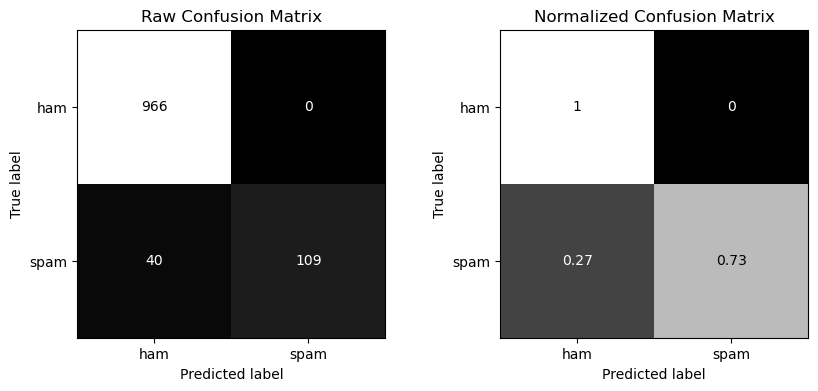

In [288]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp_raw.plot(ax=ax[0], colorbar=False,  cmap=plt.cm.gist_yarg_r)
ax[0].set_title('Raw Confusion Matrix')

# Compute and plot normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=le.classes_).plot(ax=ax[1], colorbar= False,  cmap=plt.cm.gist_yarg_r)
ax[1].set_title('Normalized Confusion Matrix')

# Show the figure
plt.show()

False alarm is ideal (0%) but  
Missed alarm rate is significant (27%).

In [289]:
y_test.value_counts()

0    966
1    149
Name: cat_label, dtype: int64

We have no FP (actually ham predicted as spam)  
and 40 FN (actually spam predicted as ham.)  
It's a good result for such a simple model  
but after all we pass 40 spam messages to the user's inbox from 185 spam messages.

### Linear regression ROC-AUC

In [290]:
predictions = lr.predict_proba(X_test)             # array of probabilities [0,1]
fpr1, tpr2, thres = roc_curve( y_test, predictions[:,1]) # select the second dimension with class 1 probabilities

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,0,1], y=[0,1,1], name='Ideal ROC curve',line=dict(color="blue", width=2)))
fig.add_trace(go.Scatter(  x= fpr1,  y= tpr2, mode='lines', fill= 'tozeroy', name= "ROC-AUC (sklearn engine)" , 
                         line=dict(color="grey", width=2))
)
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="baseline",line=dict(color="Green", width=1)))
fig.update_layout(title= "ROC-AUC curve", xaxis_title="FPR", yaxis_title="TPR", width=900, height=750 )
fig.show()

### Linear regression PR-curve

In [291]:
predictions = lr.predict_proba(X_test)             # array of probabilities [0,1]
precision1, recall1, thres = precision_recall_curve( y_test, predictions[:,1]) # select the second dimension with class 1 probabilities

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,1,1], y=[1,1,0], name='Ideal ROC curve',line=dict(color="blue", width=2)))
fig.add_trace(go.Scatter(  x= recall1,  y= precision1, mode='lines', fill= 'tozeroy', name= "sklearn PR-curve" , 
                         line=dict(color="grey", width=2))
)

fig.add_trace(go.Scatter(x=[0,1], y=[1,0], name="baseline",line=dict(color="Green", width=1)))
fig.update_layout(title= "sklearn PR-AUC curve", xaxis_title="Recall (TPR)", yaxis_title="Precision (PPV)", width=800, height=750 )
fig.show()

### Наивный Байесовский классификатор
train on CountVectorizer

In [292]:
df

,label,sms_message,cat_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [293]:
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['cat_label'], test_size=0.2, random_state=42)
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((1115,), (1115,), (4457,), (4457,))

In [294]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes classifier for multinomial models

In [295]:
# Initialize the CountVectorizer
count_vector = CountVectorizer()

# Learn the vocabulary dictionary and return document-term matrix. 
train_tensor = count_vector.fit_transform(X_train).toarray().astype('float')

# Transform testing data and return the matrix. 
# Note we are NOT fitting BUT transforming the testing data into the CountVectorizer()
test_tensor = count_vector.transform(X_test).toarray().astype('float')

train_tensor.shape, test_tensor.shape

((4457, 7702), (1115, 7702))

In [296]:
test_tensor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [297]:
# count_vector.get_params()  

'(?u)\\b\\w\\w+\\b'  
regex that matches any sequence of `two or more` word characters that is surrounded by word boundaries.

In [298]:
# count_vector.get_feature_names_out()[-10:]   # get last 10 feature names of count vectorizer

In [299]:
# shapes of the tensors (rows - number of messages, columns - number of terms(tokens) in the vocabulary)
# number of terms in the vocabulary is the number of features in the tensor
train_tensor.shape, test_tensor.shape

((4457, 7702), (1115, 7702))

In [300]:
# всего слов в предложениях (размер train словаря)
train_tensor.sum()

64307.0

In [301]:
spam_train_tensor = train_tensor[(y_train == 1).values]

# тензор с предложениями класса not_spam
not_spam_train_tensor = train_tensor[(y_train == 0).values]
spam_train_tensor.shape, not_spam_train_tensor.shape

((598, 7702), (3859, 7702))

In [302]:
# spam_train_tensor  contains a count of how many times each word appears in a set of spam messages.
# The sum(axis=0) function is used to sum up the counts of each word across all spam messages, 
#resulting in a 1D tensor with a length equal to the number of words in the dataset.

# Dividing this 1D tensor by the total count of words in the spam dataset (spam_train_tensor.sum()) 
# gives the probability of each word occurring in a spam message. 
# This is referred to as the "spam probability" of each word, denoted as w_proba_spam.
#Вероятность слова при условии что предложение спам
w_proba_spam = (spam_train_tensor.sum(axis=0)) / (spam_train_tensor.sum())

#Вероятность слова при условии что предложение не спам
w_proba_notspam = (not_spam_train_tensor.sum(axis=0)) / (not_spam_train_tensor.sum())

w_proba_spam.shape, w_proba_notspam.shape, w_proba_spam.sum(), w_proba_notspam.sum()

((7702,), (7702,), 1.0, 1.0)

In [303]:
# вероятность, что любое сообщение спам
p_spam = (y_train == 1).values.sum() / len(y_train)

# вероятность, что любое сообщение не спам
p_not_spam = (y_train == 0).values.sum() / len(y_train)

p_spam, p_not_spam, p_spam + p_not_spam

(0.13417096701817366, 0.8658290329818263, 1.0)

In [329]:
# max and min values in the test tensor
test_tensor.max(), test_tensor.min() 

(15.0, 0.0)

we have word counts equal to 15 and 0 in the test tensor.  
It means that some message in the test set was repeated 15 times in the training set.

In [365]:
search_val = test_tensor.max()
ind = [i for i in range(test_tensor.shape[0]) if test_tensor[i,:].max() == search_val] # search for the index of the message with 15 words 
X_test.iloc[ind].values[0]


"&lt;#&gt;  is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas  &lt;#&gt;  Good Mornings Afternoons, Evenings Nights. RememberI AM the first to WISHING U ALL THESE...your's Raj"

In [357]:
str = X_test.iloc[ind].values[0]
str

"&lt;#&gt;  is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas  &lt;#&gt;  Good Mornings Afternoons, Evenings Nights. RememberI AM the first to WISHING U ALL THESE...your's Raj"

In [340]:
count_vector.get_feature_names_out()[620]

'762'

In [348]:
X_test.iloc[620]

"&lt;#&gt;  is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas  &lt;#&gt;  Good Mornings Afternoons, Evenings Nights. RememberI AM the first to WISHING U ALL THESE...your's Raj"

In [331]:
test_tensor[620,:] .max()

15.0

In [ ]:
# test_tensor = count_vector.transform(X_test).toarray().astype('float')

In [346]:
count_vector.transform(X_test).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [311]:
count_vector.get_feature_names_out()[test_tensor[ind[0]] ==15]

array(['happy'], dtype=object)

In [312]:
#проверим на одном семпле
test_sample = test_tensor[620]

In [313]:
test_sample.shape, test_sample.max()

((7702,), 15.0)

In [314]:
test_sample = test_tensor[0]
test_sample

array([0., 0., 0., ..., 0., 0., 0.])

In [315]:
# посчитает значение за спам 
np.log(p_spam) + (test_sample*np.log(w_proba_spam+0.00000001)).sum()

-202.84623588556516

In [316]:
#посчитаем значение против спама
np.log(p_not_spam) + (test_sample*np.log(w_proba_notspam+0.00000001)).sum()

-135.87460246973149

In [317]:
# видно что значение против спама больше, чем значение за спам 
# соответственно значение не спам

In [318]:
#посчитаем для всей тестовой выборки

#размер тестовой выборки
test_tensor.shape

(1115, 7702)

In [319]:
#посчитаем предсказания как сравнение величинв за спам и против спама
y_pred = (np.log(p_spam) + (test_tensor*np.log(w_proba_spam+0.00000001)).sum(axis=1)) >= \
 np.log(p_not_spam) + (test_tensor*np.log(w_proba_notspam+0.00000001)).sum(axis=1)

In [320]:
predictions = y_pred        # array of probabilities [0,1]
precision1, recall1, thres = precision_recall_curve( y_test.to_numpy(), predictions) 

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,1,1], y=[1,1,0], name='Ideal ROC curve',line=dict(color="blue", width=2)))
fig.add_trace(go.Scatter(  x= recall1,  y= precision1, mode='lines', fill= 'tozeroy', name= "sklearn PR-curve" , 
                         line=dict(color="grey", width=2))
)

fig.add_trace(go.Scatter(x=[0,1], y=[1,0], name="baseline",line=dict(color="Green", width=1)))
fig.update_layout(title= "sklearn PR-AUC curve", xaxis_title="Recall (TPR)", yaxis_title="Precision (PPV)", width=800, height=750 )
fig.show()

In [321]:
# предсказанные значения
y_pred.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [322]:
#истиные значение
y_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [323]:
#сравним реальные метки с предсказанными
true_predictions = (y_pred.astype(int) == y_test.to_numpy())
true_predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [324]:

#посчитаем точность модели как отношение количество совпадений к размеру выборки  

# mean accuracy
true_predictions.sum()/true_predictions.shape[0]    

0.9856502242152466

In [325]:
print('Naiive Bayes Report (count vectorizer) Report')
print(rep_nbmanual:= classification_report(y_test.to_numpy(), y_pred.astype(int), digits=5))

Naiive Bayes Report (count vectorizer) Report
              precision    recall  f1-score   support

           0    0.98868   0.99482   0.99174       966
           1    0.96503   0.92617   0.94521       149

    accuracy                        0.98565      1115
   macro avg    0.97686   0.96050   0.96847      1115
weighted avg    0.98552   0.98565   0.98553      1115



### sklearn Naive Bayes classifier for multinomial models
The multinomial Naive Bayes classifier is suitable for classification with discrete features  
(e.g., word counts for text classification).  
The multinomial distribution normally requires integer feature counts.  
However, in practice, fractional counts such as tf-idf may also work.

In [326]:
mnb_clf = MultinomialNB(alpha = 1)
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

mnb_clf.fit(training_data, y_train)

print(f'mean_accuracy: {mnb_clf.score(testing_data, y_test)}')
predictions = mnb_clf.predict(testing_data)
print('Naiive Bayes Report (sklearn) Report')
print(rep_mnb:= classification_report(y_test, predictions,digits= 5))


mean_accuracy: 0.9919282511210762
Naiive Bayes Report (sklearn) Report
              precision    recall  f1-score   support

           0    0.99077   1.00000   0.99536       966
           1    1.00000   0.93960   0.96886       149

    accuracy                        0.99193      1115
   macro avg    0.99538   0.96980   0.98211      1115
weighted avg    0.99200   0.99193   0.99182      1115



The actual outcome depends on classificator hyperparameters and the way we preprocess the data,
alpha in this case is a smoothing parameter, which is used to avoid zero probabilities in the model.  

Without probabilities PR-curve has limited representation

In [327]:
# predictions = y_pred        
precision1, recall1, thres = precision_recall_curve( y_test, predictions) 

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,1,1], y=[1,1,0], name='Ideal ROC curve',line=dict(color="blue", width=2)))
fig.add_trace(go.Scatter(  x= recall1,  y= precision1, mode='lines', fill= 'tozeroy', name= "sklearn PR-curve" , 
                         line=dict(color="grey", width=2))
)

fig.add_trace(go.Scatter(x=[0,1], y=[1,0], name="baseline",line=dict(color="Green", width=1)))
fig.update_layout(title= "sklearn PR-AUC curve", xaxis_title="Recall (TPR)", yaxis_title="Precision (PPV)", width=800, height=750 )
fig.show()

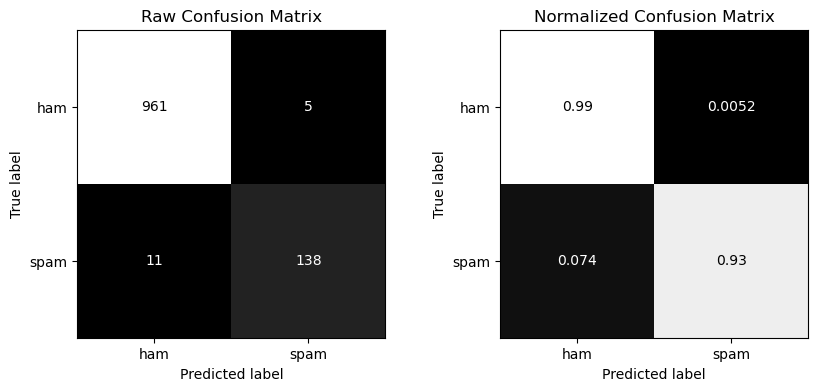

In [328]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp_raw.plot(ax=ax[0], colorbar=False,  cmap=plt.cm.gist_yarg_r)
ax[0].set_title('Raw Confusion Matrix')

# Compute and plot normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=le.classes_).plot(ax=ax[1], colorbar= False,  cmap=plt.cm.gist_yarg_r)
ax[1].set_title('Normalized Confusion Matrix')

# Show the figure
plt.show()

False alarm is very low (0.5%)  
Missed alarm is good too (7.4%).

We managed to reduce the number of spam messages from 40 to 11 that filled our inbox. 
That's a pretty good result!

### Main takeaways:
<h4>NB (Naive Bayes) and LR (Logistic Regression) are both popular machine learning algorithms used for spam recognition.

Naive Bayes is a probabilistic algorithm that calculates the probability of an email being spam or not based on the occurrence of certain words or features in the email. It assumes that the occurrence of each feature is independent of the others, hence the "naive" assumption. Naive Bayes is a fast algorithm that works well with small datasets and can handle high-dimensional feature spaces.

Logistic Regression, on the other hand, is a statistical algorithm that predicts the probability of an email being spam or not based on the relationship between the dependent variable (spam or not) and the independent variables (features). It uses a sigmoid function to map any real-valued input to a value between 0 and 1, representing the probability of the email being spam. Logistic Regression is a versatile algorithm that can handle both linear and non-linear relationships between the variables.

In terms of performance, both algorithms can achieve high accuracy in spam recognition tasks. However, Naive Bayes may perform better with small datasets and high-dimensional feature spaces, while Logistic Regression may be more suitable for large datasets with non-linear relationships between variables.

Overall, the choice between NB and LR for spam recognition depends on the specific characteristics of the dataset and the goals of the task. It's always a good idea to try both algorithms and compare their performance on the given dataset.<h4>

### [`Tfidftransformer` vs `Tfidfvectorizer`. When to use what?](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.ZEpOfOxBydY)
So now you may be wondering, why you should use more steps than necessary if you can get everything done in two steps. Well, there are cases where you want to use Tfidftransformer over Tfidfvectorizer and it is sometimes not that obvious. Here is a general guideline:

<ul>
<li>If you need the term frequency (term count) vectors for different tasks, use <strong>Tfidftransformer</strong>.</li>
<li>If you need to compute tf-idf scores on documents within your “training” dataset, use <strong>Tfidfvectorizer</strong></li>
<li>If you need to compute tf-idf scores on documents outside your “training” dataset, use either one, <strong>both will work</strong>.</li>
</ul>

